# Audax India Randonneurs

Audax India Randonneurs (AIR) is the all-India organization of randonneurs, which is recognized by Audax Club Parisien (ACP) for conducting and overseeing all Brevets de Randonneurs Mondiaux (BRMs) and Audax events in India.

BRM stands for Brevets de Randonneurs Mondiaux (BRMs). Randonneuring is long-distance Endurance Cycling with rides of 200, 300, 400, 600 and 1000 kms.

## Business understanding

We will answer follwing questions

1. Which club is most active in terms of number of BRM events conducted and number of participats ?
2. How many different category of events conducted accross India by AIR ?
2. How many riders complete ride on time based on different category ?

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import mysql.connector

sql_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="demo@123",
    database="air"
)

## Data understanding

We have scraped the data from AIR website (https://audaxindia.org) and dumped in SQL Database

We have 4 tables Club, Event, Cyclist and Record 

1. Club --> It contains information about clubs
2. Event --> It contains information about events
3. Cyclist --> It contains profile of cyclist
4. Record --> It contains infromation about ride of all rides event wise

## Data preparation

Data is download and saved in database using `fetch_data` program.

This data set is clean and do not contains null values.

Record table contains a column time_mins which shows how much time it took to complete the ride. It can have values

1. DNF --> Do not finish
2. LF --> Late Finish
3. DNS --> Did not start

We will clean and remove these values when required

In [19]:
clubs = pd.read_sql_query("SELECT * FROM Club", sql_connection)
clubs = clubs.set_index('clubID')

events = pd.read_sql_query("SELECT * FROM Event", sql_connection)
events = events.set_index('eventID')

cyclists = pd.read_sql_query("SELECT * FROM Cyclist", sql_connection)
cyclists = cyclists.set_index('air')

records = pd.read_sql_query("SELECT * FROM Record", sql_connection)
records = records.set_index('recordID')

In [14]:
clubs.head()

,name
clubID,
14,Amaravati Randonneurs
10,Aurangabad Randonneurs
13,Bangalore Randonneurs
38,Bathinda Randonneurs Cycling Club
7,Bhopal Randonneurs


In [15]:
events.head()

,url,distance,date,clubID
eventID,,,,
1,https://www.audaxindia.org/event-e-2855,200,2018-11-18,1
2,https://www.audaxindia.org/event-e-2856,400,2018-11-24,1
3,https://www.audaxindia.org/event-e-2857,300,2018-12-02,1
4,https://www.audaxindia.org/event-e-2858,1200,2018-12-13,1
5,https://www.audaxindia.org/event-e-2859,600,2018-12-29,1


In [16]:
cyclists.head()

,name,clubID
air,,
0001,Divya Tate,5
0002,Gagan Grover,5
0006,Dipankar Paul,13
0009,Anil Uchil,19
0014,Alok Shrotri,13


In [17]:
records.head()

,air,eventID,time_mins
recordID,,,
1,5877,1,655
2,8923,1,763
3,8609,1,770
4,7517,1,719
5,4252,1,660


## Data modeling

In [26]:
events_by_club = events.join(clubs, on="clubID")
events_by_club.head()

,url,distance,date,clubID,name
eventID,,,,,
1,https://www.audaxindia.org/event-e-2855,200,2018-11-18,1,Cyclone Cycling Club
2,https://www.audaxindia.org/event-e-2856,400,2018-11-24,1,Cyclone Cycling Club
3,https://www.audaxindia.org/event-e-2857,300,2018-12-02,1,Cyclone Cycling Club
4,https://www.audaxindia.org/event-e-2858,1200,2018-12-13,1,Cyclone Cycling Club
5,https://www.audaxindia.org/event-e-2859,600,2018-12-29,1,Cyclone Cycling Club


## How many events were conducted based on distance

In [27]:
records_event = records.join(events, on="eventID")
records_event.head()

,air,eventID,time_mins,url,distance,date,clubID
recordID,,,,,,,
1,5877,1,655,https://www.audaxindia.org/event-e-2855,200,2018-11-18,1
2,8923,1,763,https://www.audaxindia.org/event-e-2855,200,2018-11-18,1
3,8609,1,770,https://www.audaxindia.org/event-e-2855,200,2018-11-18,1
4,7517,1,719,https://www.audaxindia.org/event-e-2855,200,2018-11-18,1
5,4252,1,660,https://www.audaxindia.org/event-e-2855,200,2018-11-18,1


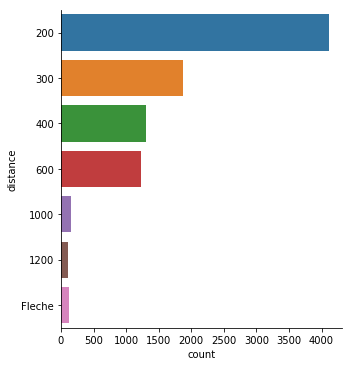

In [28]:
sns.catplot(y="distance",
            data= records_event,
            order=["200", 
                   "300", 
                   "400", 
                   "600", 
                   "1000", 
                   "1200", 
                   "Fleche"],
            kind="count")

## How many events were conducted groupped by clubs

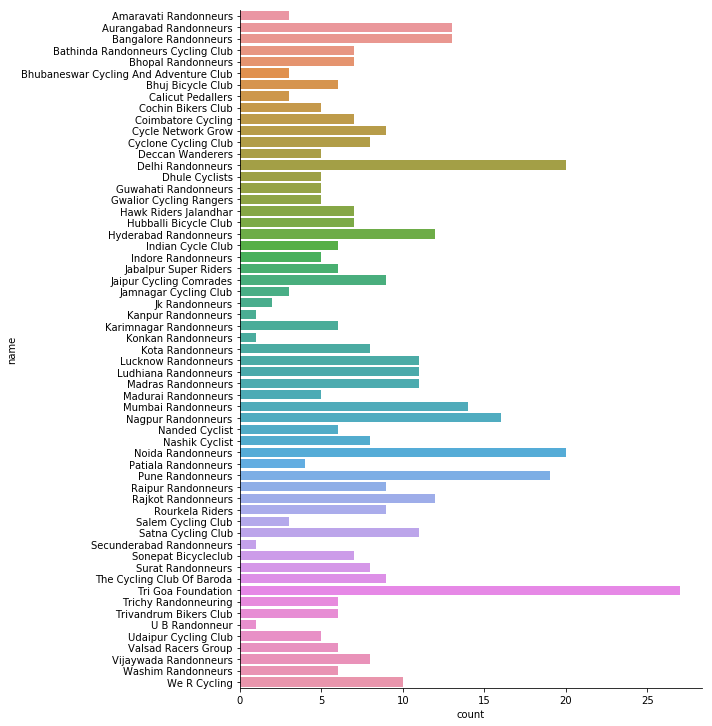

In [29]:
sns.catplot(y="name",
            data=events_by_club.sort_values(by='name'),
            kind="count", 
            height = 10)

## Top 5 Clubs

In [30]:
events_by_club.groupby('name').count().sort_values('clubID', ascending=False)[:5]

,url,distance,date,clubID
name,,,,
Tri Goa Foundation,27,27,27,27
Noida Randonneurs,20,20,20,20
Delhi Randonneurs,20,20,20,20
Pune Randonneurs,19,19,19,19
Nagpur Randonneurs,16,16,16,16


## Participartion by Club

In [32]:
records_event_club = records_event.join(clubs, on="clubID")
records_event_club.head()

,air,eventID,time_mins,url,distance,date,clubID,name
recordID,,,,,,,,
1,5877,1,655,https://www.audaxindia.org/event-e-2855,200,2018-11-18,1,Cyclone Cycling Club
2,8923,1,763,https://www.audaxindia.org/event-e-2855,200,2018-11-18,1,Cyclone Cycling Club
3,8609,1,770,https://www.audaxindia.org/event-e-2855,200,2018-11-18,1,Cyclone Cycling Club
4,7517,1,719,https://www.audaxindia.org/event-e-2855,200,2018-11-18,1,Cyclone Cycling Club
5,4252,1,660,https://www.audaxindia.org/event-e-2855,200,2018-11-18,1,Cyclone Cycling Club


In [33]:
records_event_club.groupby('name').count().sort_values('air', ascending=False)[:5]

,air,eventID,time_mins,url,distance,date,clubID
name,,,,,,,
Bangalore Randonneurs,870,870,870,870,870,870,870
Madras Randonneurs,695,695,695,695,695,695,695
Pune Randonneurs,632,632,632,632,632,632,632
Mumbai Randonneurs,623,623,623,623,623,623,623
Noida Randonneurs,443,443,443,443,443,443,443


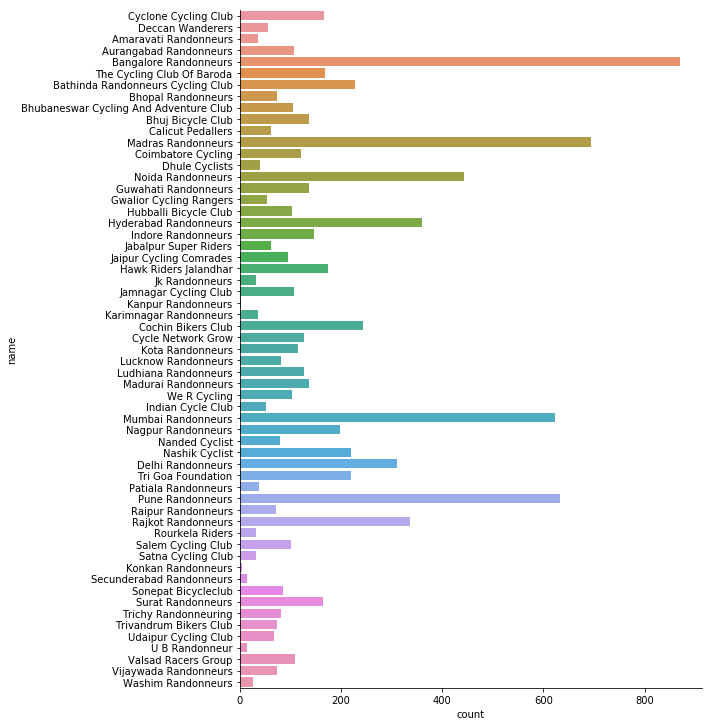

In [34]:
sns.catplot(y = 'name',
            data = records_event_club,
            kind = 'count',
            height= 10)

## How many percents of cyclist finish on time in each category

In [35]:
distances = ['200', '300', '400', '600', '1000', '1200']
percent_finisher = []
for distance in distances:
    record_event_distance = records_event[records_event['distance'] == distance]
    dnf = (record_event_distance['time_mins'] == 'DNF').sum()
    lf = (record_event_distance['time_mins'] == 'LF').sum()
    total = len(record_event_distance)
    percent_finisher.append((total - dnf + lf) / total * 100)
percent_finisher_df = pd.DataFrame({'distance': distances, 'percent finshed': percent_finisher})
percent_finisher_df

,distance,percent finshed
0,200,94.379562
1,300,92.658092
2,400,91.858679
3,600,81.148867
4,1000,72.972973
5,1200,75.652174


## Results evaluation

1. Goa Club is conducted most number of events in this year and Bangalore Club had most number of Randonneurs.
2. Most of the Randonneurs participate in BRM 200, followed by 300, 400, 600 BRMs
3. 200, 300 and 400km BRMs have good finishing rate, more than 90% of riders finish it. But 600, 1000 and 1200km BRMs have low finish rate, less than 81%